# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/1.5diabetes_prediction_dataset.csv', delimiter=',')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Опишем наш датафрейм в общем:
 - Всего 100000 строки, пустые строки (NaN) отсутствуют
 - Всего 9 колонок. Из них со значениями float64 3 колонки, int64 4 колонки, object 2 колонки
 - Объем занимаемый датафреймом 6.9+ MB

Рассмотрим статистику для числовых данных:

In [46]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [47]:
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


**Вывод:**

*   Все значения по выборке заполнены
*   Средний возраст по выборке 41,89, медианный 43
*   У большинства выборки нет гипертонии и болезней сердца
*   Среднее значение и медиана bmi говорит нам, что в выборке преобладает избыточный вес (25–29,9). Хотя в выборке есть как недостаточный вес (менее 18,5), нормальный (18,5–24,9) и люди с ожирением (30 и более)
*   Уровень HbA1c (среднего уровня сахара в крови человека за последние 2-3 месяца) в среднем 5,52 (медиана 5,8), что говорит о том, что в среднем по выборке высокий риск диабета. И стандартное отклонение 1.07 говорит нам о том, что у части выборки уже есть диабет, а у другой части нет. 
*   Среднее значение уровня глюкозы в крови 138,06, медиана 140. 140 - это верхняя граница нормального сахара в крови, 80 - нижняя граница. Значит мы можем говорить что примерно у половины выборки уровень глюкозы в пределах верхней границы нормы.
*   В выборке больше Женщин (58,55%)
*   Чаще встречается No Info в опыте курения
*   В среднем по выборке людей с диагнозом диабет меньше, чем без диабета

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [48]:
len(df)- len(df.drop_duplicates ())

3854

Всего 3854 дубликата, удалим их

In [49]:
df = df.drop_duplicates()

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [50]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Пропусков в данных средствами Pandas мы не видим, поэтому посмотрим по-другому:

In [51]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

В gender есть значения Other 18 строк. Пожалуй, мы уберем эти значения

In [52]:
df = df[df['gender'] != 'Other']

In [53]:
df['age'].value_counts()

age
80.00    4932
51.00    1566
47.00    1509
48.00    1508
53.00    1497
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

В age есть и только что родившиеся дети, так и люди возрастов 80 лет

In [54]:
df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

В smoking_history мы видим следующие значения: never (никогда), No Info (нет информации), former (бывший курильщик), current (курит сейчас), not current (не курит сейчас) и ever (курил когда-либо). Мы не будем удалять No Info, так как мы потеряем большое количество строк для анализа (34,21%)

В столбцах hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, diabetes нет значений, которые не были бы предусмотрены названием столбца

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [55]:
df_transform = df.copy()
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [56]:
df_transform['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

Female = 0, Male = 1

In [57]:
df_transform['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

По этому столбцу мы лучше объединим следующие значения: 
*   current (курит сейчас) = current
*   not current (не курит сейчас), former (бывший курильщик), ever (курил когда-либо), так как все они означают что человек курил когда-то, но не курит сейчас = ever
*   never (никогда) = never
*   No Info (нет информации) = No Info

In [58]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never']:
        return 'never'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'ever'
    else:
        return 'No Info'

df_transform['smoking_history'] = df_transform['smoking_history'].apply(recategorize_smoking)

# Проверим новые значения
print(df_transform['smoking_history'].value_counts())

smoking_history
never      34395
No Info    32881
ever       19655
current     9197
Name: count, dtype: int64


По выборке мы можем поменять gender и smoking_history с категориальных на числовые представления

In [59]:
df_transform['gender'] = pd.factorize(df_transform['gender'])[ 0 ]
df_transform['gender'].value_counts()

gender
0    56161
1    39967
Name: count, dtype: int64

In [60]:
df_transform = pd.get_dummies(df_transform, columns=['smoking_history'], dtype=int)

In [61]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   96128 non-null  int64  
 1   age                      96128 non-null  float64
 2   hypertension             96128 non-null  int64  
 3   heart_disease            96128 non-null  int64  
 4   bmi                      96128 non-null  float64
 5   HbA1c_level              96128 non-null  float64
 6   blood_glucose_level      96128 non-null  int64  
 7   diabetes                 96128 non-null  int64  
 8   smoking_history_No Info  96128 non-null  int32  
 9   smoking_history_current  96128 non-null  int32  
 10  smoking_history_ever     96128 non-null  int32  
 11  smoking_history_never    96128 non-null  int32  
dtypes: float64(3), int32(4), int64(5)
memory usage: 8.1 MB


**Вывод:**

Мы подготовили денные для дальнейшей визуализации и обработке, сохранив при этом большинство. gender кодировался в 0 и 1, а вот smoking_history я решила сначала объединить схожие по значению, а затем кодировать через get_dummies, так как позже я могу для каждого столбца посмотреть корреляции.

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

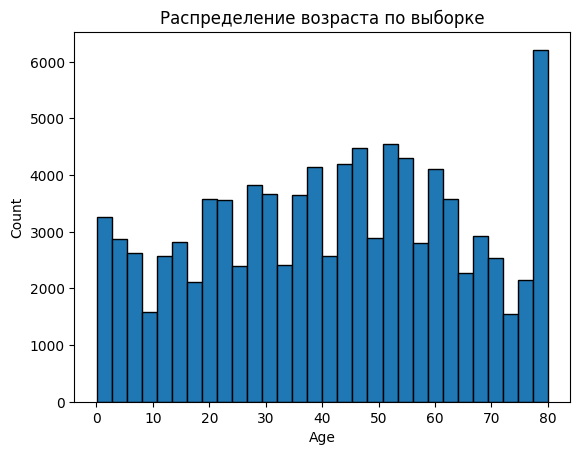

In [75]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Распределение возраста по выборке')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

По выборке чаще встречаются люди 80 лет

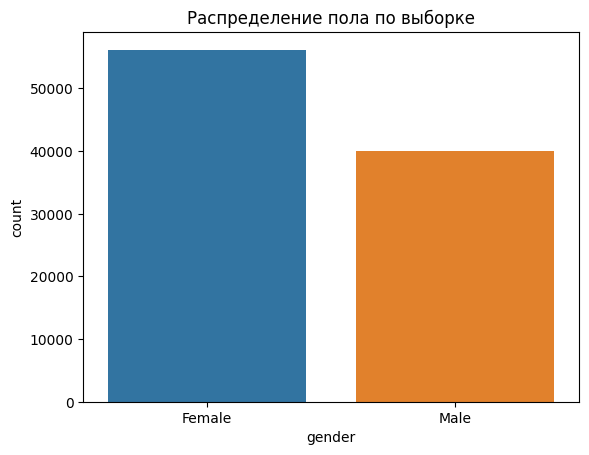

In [76]:
sns.countplot(x='gender', data=df)
plt.title('Распределение пола по выборке')
plt.show()

По выборке чаще встречаются женщины

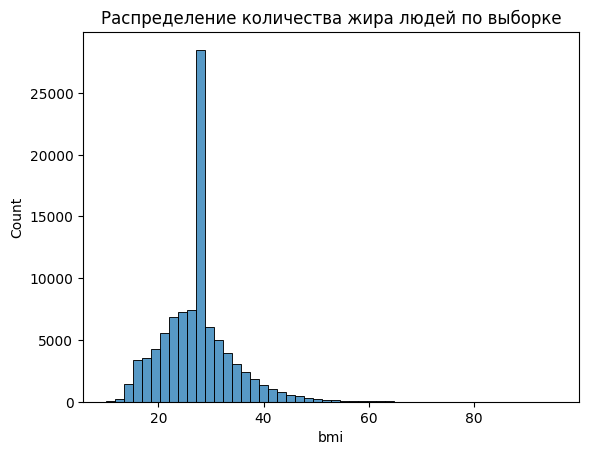

In [77]:
sns.histplot(df['bmi'], bins=50)
plt.title('Распределение количества жира людей по выборке')
plt.show()

У большей части выборки избыточный вес

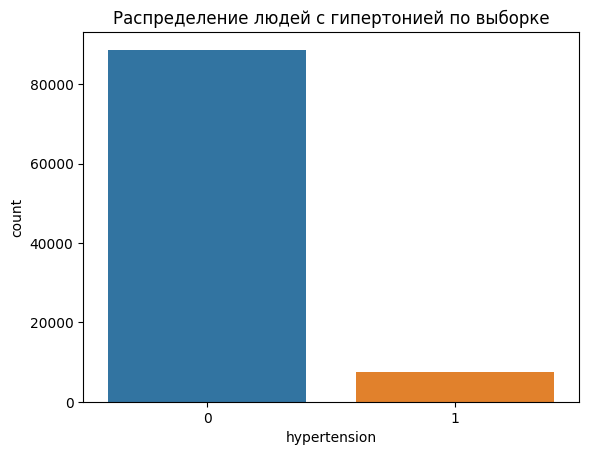

In [80]:
sns.countplot(x='hypertension', data=df)
plt.title('Распределение людей с гипертонией по выборке')
plt.show()

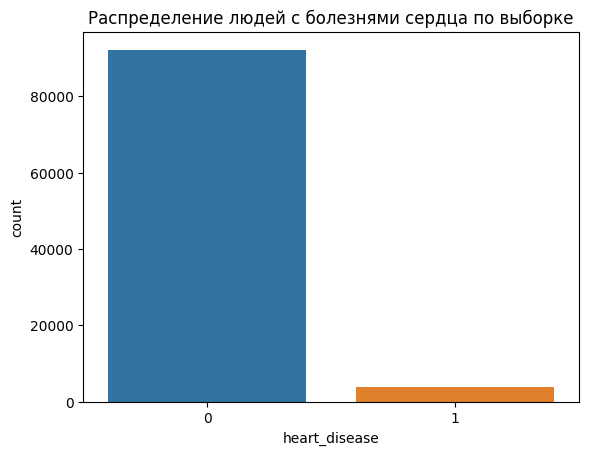

In [85]:
sns.countplot(x='heart_disease', data=df)
plt.title('Распределение людей с болезнями сердца по выборке')
plt.show()

У большей части выборки гипертония и болезни сердца отсутствуют

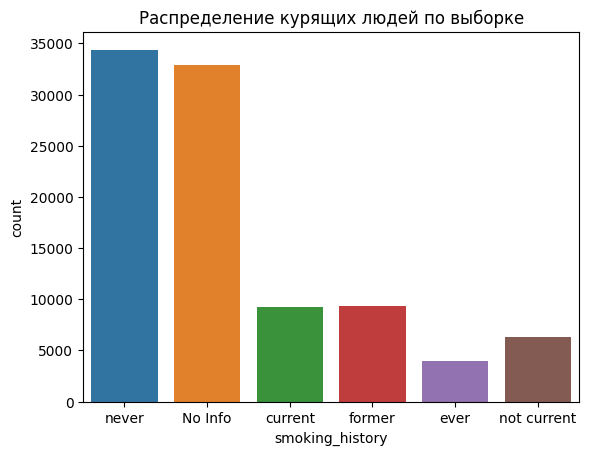

In [84]:
sns.countplot(x='smoking_history', data=df)
plt.title('Распределение курящих людей по выборке')
plt.show()

Большая часть людей в выборке никогда не курили и вторая значительная часть не предоставили эту информацию

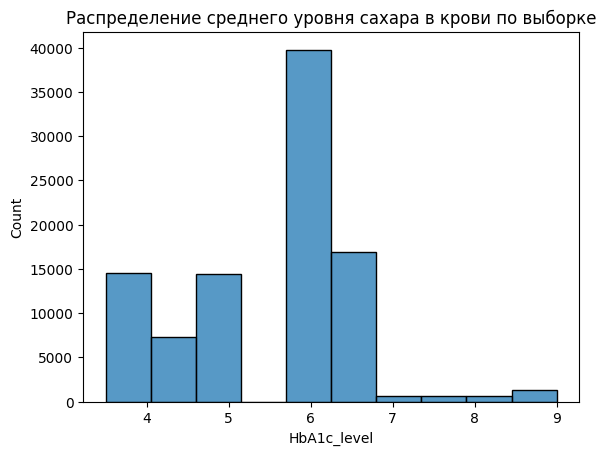

In [87]:
sns.histplot(df['HbA1c_level'], bins=10)
plt.title('Распределение среднего уровня сахара в крови по выборке')
plt.show()

У большей части выборки показатели среднего уровня сахара в крови находится на уровне 6.0

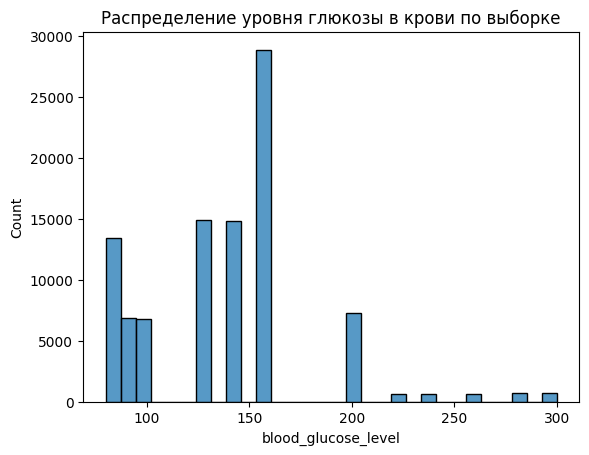

In [92]:
sns.histplot(df['blood_glucose_level'], bins=30)
plt.title('Распределение уровня глюкозы в крови по выборке')
plt.show()

У большей части выборки показатели уровня глюкозы в крови находятся на уровне 150-160

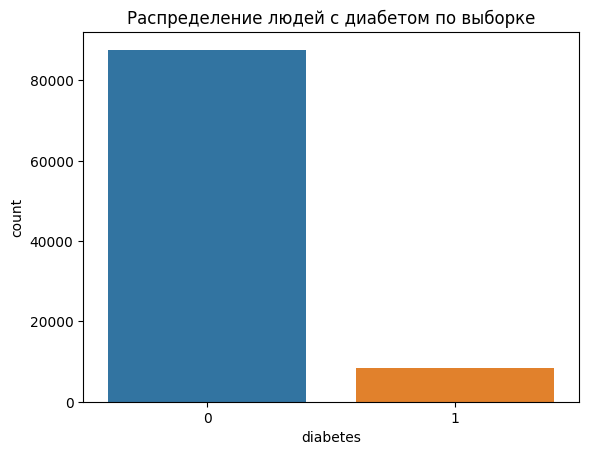

In [93]:
sns.countplot(x='diabetes', data=df)
plt.title('Распределение людей с диабетом по выборке')
plt.show()

У большей части выборки нет диабета

**Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных**

Text(0.5, 1.0, 'age')

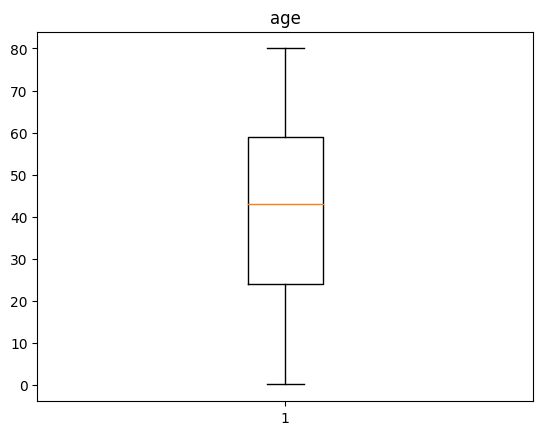

In [147]:
plt.boxplot(df['age'])
plt.title('age')

Text(0.5, 1.0, 'bmi')

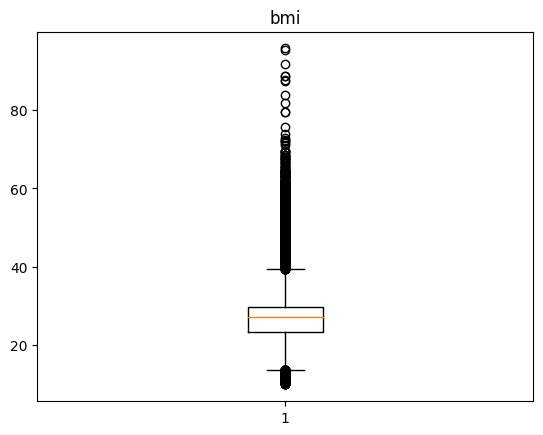

In [146]:
plt.boxplot(df['bmi'])
plt.title('bmi')

Text(0.5, 1.0, 'HbA1c_level')

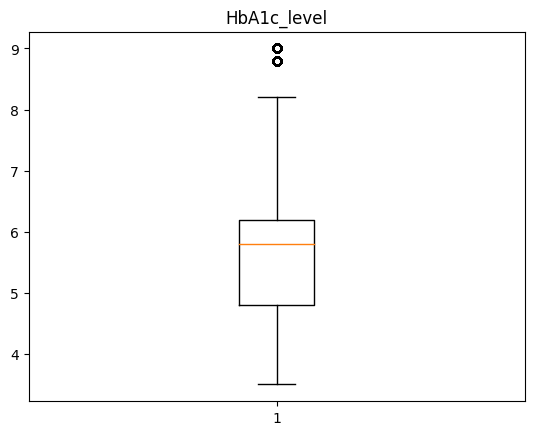

In [149]:
plt.boxplot(df['HbA1c_level'])
plt.title('HbA1c_level')

Text(0.5, 1.0, 'blood_glucose_level')

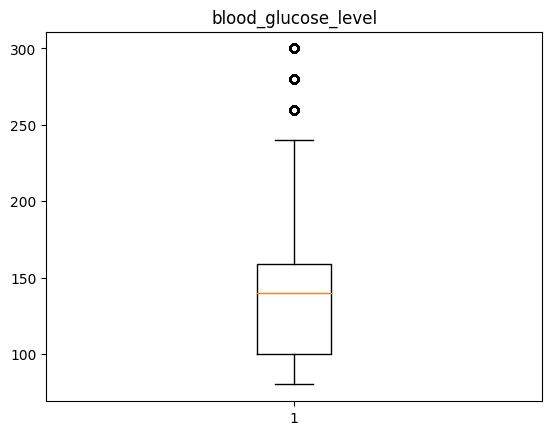

In [150]:
plt.boxplot(df['blood_glucose_level'])
plt.title('blood_glucose_level')

**Вывод:**
Мы можем говорить о том, что в age выбросы отсутствуют, а вот в bmi, HbA1c_level и blood_glucose_level есть. Однако, прежде чем удалять их нужно понять не являются ли они ложными. Большее количество выбросов мы видим в bmi.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

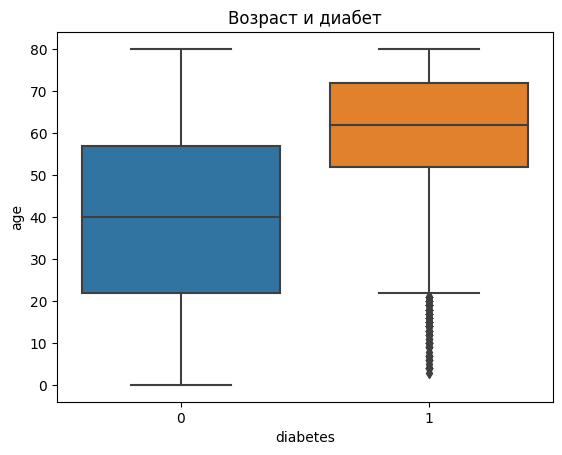

In [109]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Возраст и диабет')
plt.show()

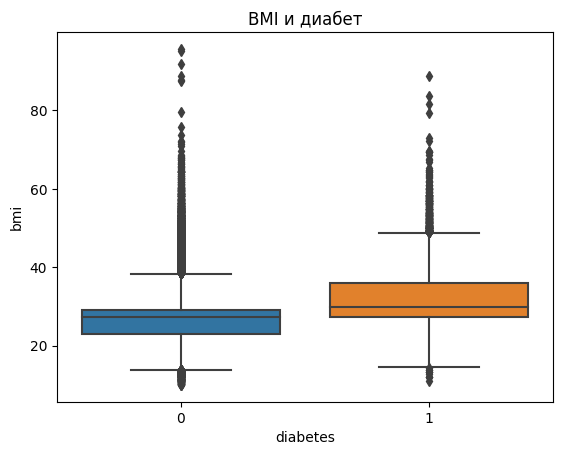

In [110]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI и диабет')
plt.show()

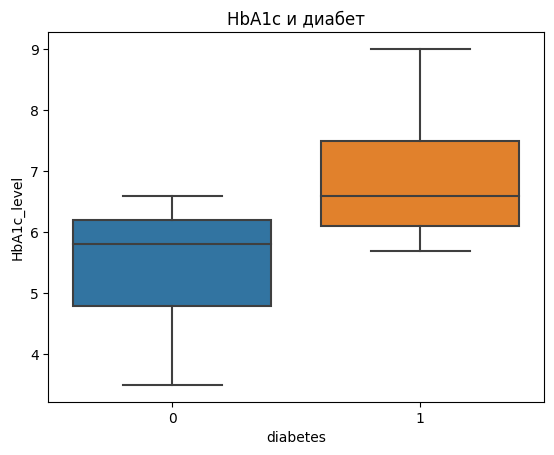

In [111]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c и диабет')
plt.show()

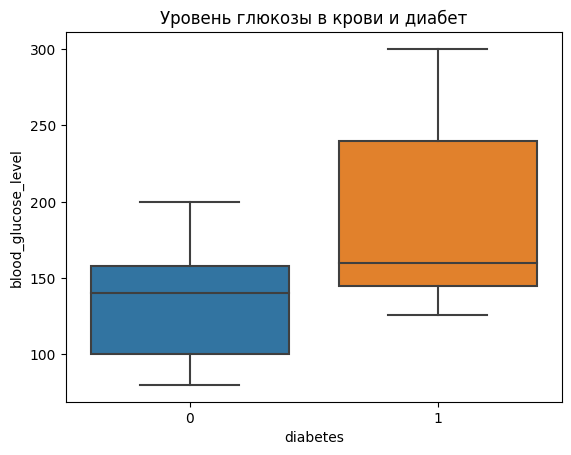

In [112]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Уровень глюкозы в крови и диабет')
plt.show()

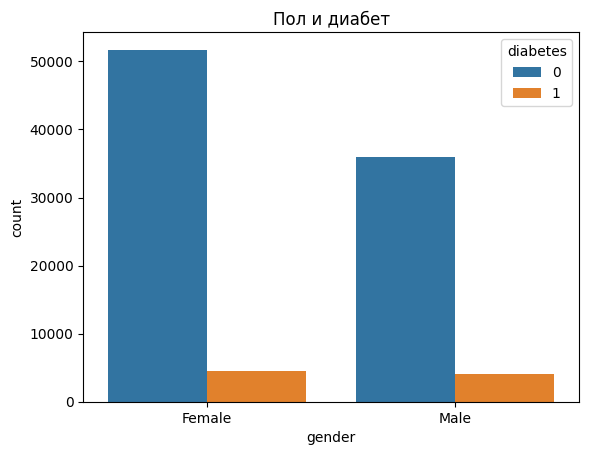

In [113]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Пол и диабет')
plt.show()

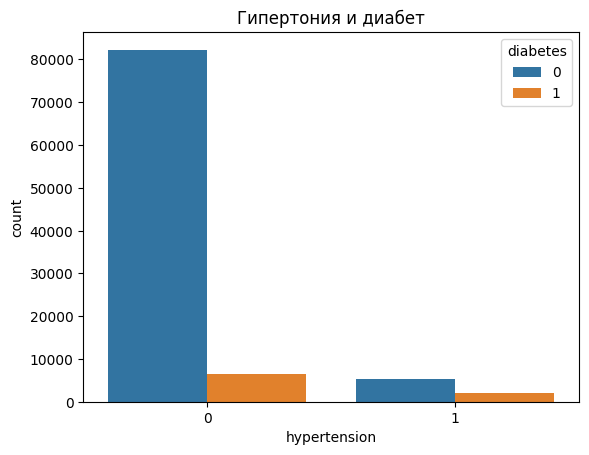

In [114]:
sns.countplot(x='hypertension', hue='diabetes', data=df)
plt.title('Гипертония и диабет')
plt.show()

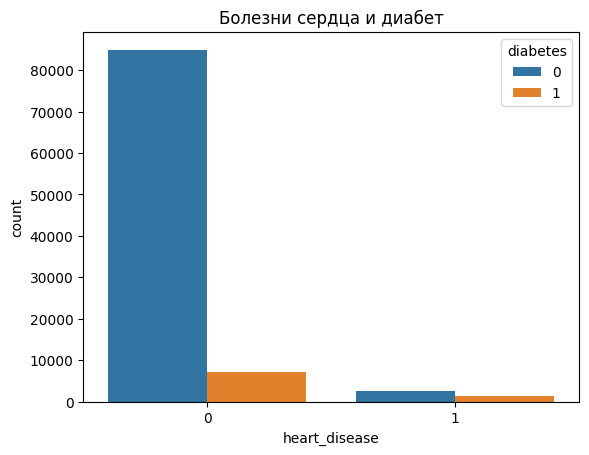

In [115]:
sns.countplot(x='heart_disease', hue='diabetes', data=df)
plt.title('Болезни сердца и диабет')
plt.show()

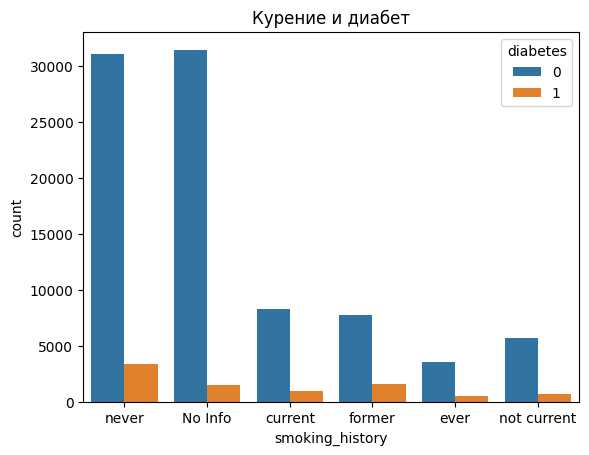

In [116]:
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title('Курение и диабет')
plt.show()

**Промежуточный вывод:** Диагноз диабет чаще имеют люди от 50 до 75. Чаще диабет у людей с избыточным весом. Уровень глюкозы и HbA1c_level чаще выше у людей с диабетом. В рамках выборки у женщин чаще диабет, хотя по графику количество женщин и мужчин не сильно отличается. У людей без гипертонии и болезней сердца больше количественно, хотя в процентном соотношении чаще встречается у людей с гипертонией и болезнями сердца. Никогда не куривших лудей с диабетом количественно больше. 

**Построение матрицы корреляции признаков (Phik или Пирсона)**

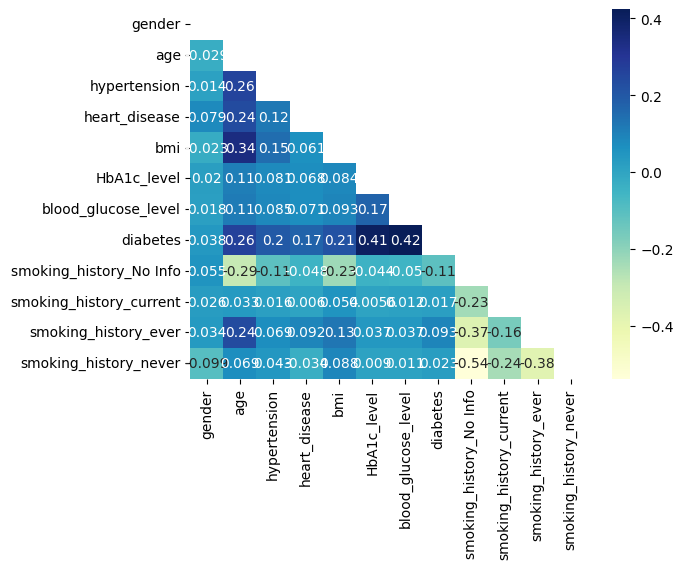

In [117]:
mask = np.triu(np.ones_like(df_transform.corr()))
dataplot = sns.heatmap(df_transform.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [140]:
df_transform_c = df_transform.corr()
df_transform_c

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_never
gender,1.000000,-0.028670,0.014196,0.078512,-0.023490,0.019928,0.017831,0.037837,0.055221,0.025989,0.033550,-0.098825
age,-0.028670,1.000000,0.257297,0.238449,0.344779,0.106708,0.114323,0.264918,-0.294216,0.033393,0.239550,0.069134
hypertension,0.014196,0.257297,1.000000,0.119972,0.148124,0.081443,0.084841,0.195696,-0.111547,0.015620,0.069261,0.042535
heart_disease,0.078512,0.238449,0.119972,1.000000,0.061382,0.068142,0.070838,0.170701,-0.048199,0.006018,0.092415,-0.033747
bmi,-0.023490,0.344779,0.148124,0.061382,1.000000,0.084443,0.092593,0.214951,-0.229381,0.053938,0.125701,0.088151
HbA1c_level,0.019928,0.106708,0.081443,0.068142,0.084443,1.000000,0.171717,0.406446,-0.044113,0.005591,0.037111,0.009003
blood_glucose_level,0.017831,0.114323,0.084841,0.070838,0.092593,0.171717,1.000000,0.424366,-0.049969,0.011964,0.037310,0.010719
diabetes,0.037837,0.264918,0.195696,0.170701,0.214951,0.406446,0.424366,1.000000,-0.112589,0.017018,0.092548,0.023115
smoking_history_No Info,0.055221,-0.294216,-0.111547,-0.048199,-0.229381,-0.044113,-0.049969,-0.112589,1.000000,-0.234525,-0.365540,-0.538197
smoking_history_current,0.025989,0.033393,0.015620,0.006018,0.053938,0.005591,0.011964,0.017018,-0.234525,1.000000,-0.164899,-0.242787


In [135]:
def make_rating(row):
    if row >= 0.5:
        return 'Выс.корр. +'
    elif row <= -0.5:
        return 'Выс.корр. -'
    elif row == 0:
        return '-'
    else:
        return 'Незн.корр.'

In [138]:
for r in range(12): 
    df_transform_c.iloc[r] = df_transform_c.iloc[r].apply(make_rating)


Примем корреляцию выше 0.5 за значимую

In [139]:
df_transform_c

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_never
gender,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
age,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
hypertension,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
heart_disease,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
bmi,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
HbA1c_level,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
blood_glucose_level,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
diabetes,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
smoking_history_No Info,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Выс.корр. -
smoking_history_current,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.


**Промежуточный вывод:**
Значимых корреляций (больше 0.5) между изначальными данными в выборке не обнаружено. Будем рассматривать корреляции выше 0.3. (не сравнивая между собой колонки типа smoking_history, так как понятно что они зависят друг от друга после нашего преобразования)

*   Чем выше age (возраст) - Тем выше bmi (показатель количества жира в организме) - корр. 0.344779
*   Чем выше HbA1c_level (показатель среднего уровня сахара в крови ) - тем больше вероятность получить диагноз diabetes (Диабет) - корр. 0.406446
*   Чем выше blood_glucose_level (уровень глюкозы в крови) - тем больше вероятность получить диагноз diabetes (Диабет) - корр. 0.424366

**Вывод:**
Мы можем говорить о том, что выбросы есть в bmi, HbA1c_level и blood_glucose_level. Однако, мы не знаем, являются ли они ложными.
Исходя из графиков мы видели, как нам казалось некоторые зависимости, например: что больше людей с диагнозом диабет женского пола, что больше с диагнозом люди более старшего возраста и т.д., но корреляционный анализ показал что это не значимые отличия, а вот от чего действительно может возникнуть диабет, так это от уровня глюкозы и уровеня HbA1c(гемоглобин A1c).

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

Давайте посмотрим, мы обнаружили корреляцию между diabetes и двумя параметрами HbA1c_level и blood_glucose_level. Может возможно это как то использовать

In [158]:
df_transform.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_never
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0


уберем столбцы с низкой корреляцией, но оставим age и bmi

In [159]:
df_corr = df_transform.copy()

In [160]:
df_corr.drop(['gender', 'hypertension', 'heart_disease', 'smoking_history_No Info', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_never'], axis= 1 , inplace= True )

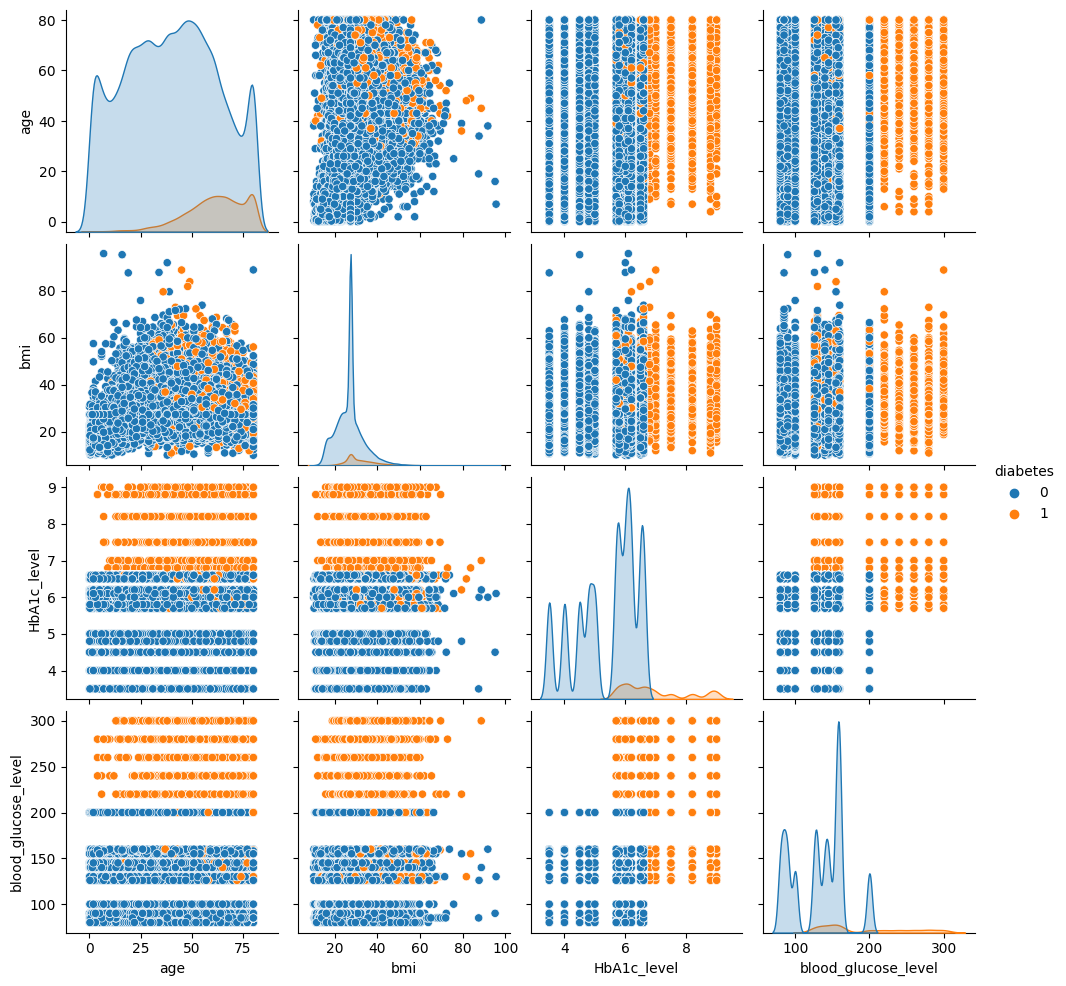

In [162]:
sns.pairplot (df_corr, hue='diabetes') 

Мы видим следующее: 
*   HbA1c_level более 6,5 (примерно) говорит о заболевании в любом возрасте и с любым индексом массы тела
*   blood_glucose_level более 120 (примерно) говорит о заболевании в любом возрасте и с любым индексом массы тела

Уберем из выборки людей без диабета и посмотрим статистику:

In [174]:
df_corr_n = df_corr[df_corr['diabetes'] == 1]
df_corr_n.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
6,44.0,19.31,6.5,200,1
26,67.0,27.32,6.5,200,1
38,50.0,27.32,5.7,260,1
40,73.0,25.91,9.0,160,1
53,53.0,27.32,7.0,159,1


In [177]:
df_corr_f = df_corr[df_corr['diabetes'] == 0]
df_corr_f.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,25.19,6.6,140,0
1,54.0,27.32,6.6,80,0
2,28.0,27.32,5.7,158,0
3,36.0,23.45,5.0,155,0
4,76.0,20.14,4.8,155,0


In [175]:
df_corr_n.describe()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8482.000000,8482.000000,8482.000000,8482.000000,8482.0
mean,60.925961,31.997755,6.934827,194.026173,1.0
std,14.545301,7.563494,1.076462,58.630047,0.0
min,3.000000,10.980000,5.700000,126.000000,1.0
25%,52.000000,27.320000,6.100000,145.000000,1.0
50%,62.000000,29.985000,6.600000,160.000000,1.0
75%,72.000000,35.940000,7.500000,240.000000,1.0
max,80.000000,88.720000,9.000000,300.000000,1.0


*   Среднее значение возраста 60.9 лет среди людей с диабетом. Минимальный возраст 3 года, максимальный 80 лет. Т.е. диагноз у людей от 3х лет и до 80 лет
*   Среднее значение индекса массы тела 31.998. Минимальное 11, маскимальное 88.72. Т.е. диагноз у людей с индексом массы тела от 11 до 88.72
*   Среднее значение уровня сахара в крови 6.93. Минимальное 5.7, максимальное 9.0. Т.е. диагноз у людей со средним уровнем сахара в крови от 5.7 до 9.0
*   Среднее значение уровня глюкозы в крови 194.03. Минимальное 126, максимальное 300. Т.е. диагноз у людей с уровнем глюкозы в крови от 126 до 300

И людей без диабета:

In [178]:
df_corr_f.describe()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
count,87646.000000,87646.000000,87646.000000,87646.000000,87646.0
mean,39.945362,26.868898,5.396934,132.817128,0.0
std,22.228848,6.509934,0.970804,34.241611,0.0
min,0.080000,10.010000,3.500000,80.000000,0.0
25%,22.000000,23.000000,4.800000,100.000000,0.0
50%,40.000000,27.320000,5.800000,140.000000,0.0
75%,57.000000,29.170000,6.200000,158.000000,0.0
max,80.000000,95.690000,6.600000,200.000000,0.0


*   Среднее значение индекса массы тела 26.87. Минимальное 10.01, маскимальное 95.69.
*   Среднее значение уровня сахара в крови 5.4. Минимальное 3.5, максимальное 6.6.
*   Среднее значение уровня глюкозы в крови 132.82. Минимальное 80, максимальное 200. Т.е. диагноз у людей с уровнем глюкозы в крови от 126 до 300

In [182]:
print(f'В среднем у людей с диабетом индекс массы тела выше на {round(31.998-26.87 , 2)} чем у людей без диабета')
print(f'В среднем у людей с диабетом уровень сахара в крови выше на {round(6.93-5.4 , 2)} чем у людей без диабета')
print(f'В среднем у людей с диабетом уровень глюкозы в крови выше на {round(194.03-132.82 , 2)} чем у людей без диабета')

В среднем у людей с диабетом индекс массы тела выше на 5.13 чем у людей без диабета
В среднем у людей с диабетом уровень сахара в крови выше на 1.53 чем у людей без диабета
В среднем у людей с диабетом уровень глюкозы в крови выше на 61.21 чем у людей без диабета


# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

О чем мы можем говорить наверняка: 
*   Чем выше уровень сахара и глюкозы в крови, тем выше вероятность получить диабет
*   В среднем индекс массы тела выше у людей с диабетом, хотя прямой зависимости по выборке не наблюдается
*   Диабет могут поставить в любом возрасте
*   Нет корреляции между диабетом и курением
*   Нет корреляции между диабетом и полом, гипетонией, болезнями сердца